In [1]:
#!pip list
# #pip install pandas
# pip install matplotlib
# pip install ipywidgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [27]:
# Load the CSV file into a dataframe
df = pd.read_csv('/Users/nagendra_subramanya@optum.com/Library/CloudStorage/OneDrive-Krishna/Nagendra/SelfCode/DatabaseInCSV/DailyLogSummaryForEachDay.csv')

# Display the first few rows of the dataframe
print(df.sort_values(by='ActivityDate', ascending=False).head())

               Category         ActivityDate  TotalValue
11195          SelfHelp  2025-11-12 00:00:00        1.00
11199  FitbitDailySteps  2025-11-12 00:00:00        0.00
11198          SelfSong  2025-11-12 00:00:00        0.25
11197          SelfTech  2025-11-12 00:00:00        0.50
11196          SelfCode  2025-11-12 00:00:00        0.50


In [28]:
# Group by 'Category' and calculate the required statistics
stats_by_category = df.groupby('Category').agg(
    TotalSum=('TotalValue', 'sum'),
    TotalCount=('TotalValue', 'count'),
    Average=('TotalValue', 'mean'),
    Median=('TotalValue', 'median')
).reset_index()

# Round the numerical columns to 2 decimal places
stats_by_category[['TotalSum', 'Average', 'Median']] = stats_by_category[['TotalSum', 'Average', 'Median']].round(2)

# Calculate zero and non-zero entries grouped by 'Category'
zero_scores = df[df['TotalValue'] == 0].groupby('Category').size().reset_index(name='Zeros')
non_zero_scores = df[df['TotalValue'] != 0].groupby('Category').size().reset_index(name='NonZeros')

# Merge zero and non-zero scores with the main stats dataframe
stats_by_category = stats_by_category.merge(zero_scores, on='Category', how='left').merge(non_zero_scores, on='Category', how='left')

# Fill NaN values with 0 for ZeroScores and NonZeroScores
stats_by_category[['Zeros', 'NonZeros']] = stats_by_category[['Zeros', 'NonZeros']].fillna(0).astype(int)

# Calculate zero and non-zero percentages
stats_by_category['ZeroP'] = ((stats_by_category['Zeros'] / stats_by_category['TotalCount']) * 100).round(2)
stats_by_category['NonZeroP'] = ((stats_by_category['NonZeros'] / stats_by_category['TotalCount']) * 100).round(2)

# Display the result
# Use the to_string() method to print the entire dataframe in a single table with all columns in one line
print(stats_by_category.to_string(index=False))



        Category    TotalSum  TotalCount  Average  Median  Zeros  NonZeros  ZeroP  NonZeroP
FitbitDailySteps 35699726.00        3456 10329.78 10363.5     82      3374   2.37     97.63
        SelfCode      317.25        2240     0.14     0.0   1711       529  76.38     23.62
        SelfHelp     1089.00        2240     0.49     0.5    914      1326  40.80     59.20
        SelfSong      121.00        2240     0.05     0.0   1872       368  83.57     16.43
        SelfTech      614.75        2240     0.27     0.0   1388       852  61.96     38.04


In [4]:
df.groupby('Category').describe()

TotalValue                                                    \
                      count          mean          std  min      25%      50%   
Category                                                                        
FitbitDailySteps     3456.0  10329.781829  5701.066645  0.0  6089.25  10363.5   
SelfCode             2240.0      0.141629     0.358730  0.0     0.00      0.0   
SelfHelp             2240.0      0.486161     0.543063  0.0     0.00      0.5   
SelfSong             2240.0      0.054018     0.132762  0.0     0.00      0.0   
SelfTech             2240.0      0.274442     0.444672  0.0     0.00      0.0   

                                      
                       75%       max  
Category                              
FitbitDailySteps  14116.50  40645.00  
SelfCode              0.00      6.50  
SelfHelp              0.75      4.25  
SelfSong              0.00      1.00  
SelfTech              0.50      3.50

In [29]:
# Convert ActivityDate to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Extract year, quarter, month, and week from ActivityDate
df['Year'] = df['ActivityDate'].dt.year
df['Quarter'] = df['ActivityDate'].dt.to_period('Q').astype(str)
df['Month'] = df['ActivityDate'].dt.strftime('%Y-%m-%b')
df['Week'] = df['ActivityDate'].dt.strftime('%Y-Week%U')

# Group by Category and Year, Quarter, Month, Week to calculate the average TotalValue
yearly_avg = df.groupby(['Category', 'Year'])['TotalValue'].mean().reset_index()
quarterly_avg = df.groupby(['Category', 'Quarter'])['TotalValue'].mean().reset_index()
monthly_avg = df.groupby(['Category', 'Month'])['TotalValue'].mean().reset_index()
weekly_avg = df.groupby(['Category', 'Week'])['TotalValue'].mean().reset_index()

# Find the best year, quarter, month, and week for each category
best_year = yearly_avg.loc[yearly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Year']]
best_quarter = quarterly_avg.loc[quarterly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Quarter']]
best_month = monthly_avg.loc[monthly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Month']]
best_week = weekly_avg.loc[weekly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Week']]

# Merge the results into a single dataframe
best_stats = best_year.merge(best_quarter, on='Category').merge(best_month, on='Category').merge(best_week, on='Category')

# Rename columns for clarity
best_stats.columns = ['Category', 'BestYear', 'BestQuarter', 'BestMonth', 'BestWeek']

# Display the result
print(best_stats.to_string(index=False))


        Category  BestYear BestQuarter   BestMonth    BestWeek
FitbitDailySteps      2021      2021Q3 2021-09-Sep 2021-Week30
        SelfCode      2025      2024Q3 2020-08-Aug 2020-Week33
        SelfHelp      2022      2022Q2 2020-09-Sep 2023-Week53
        SelfSong      2024      2024Q3 2025-11-Nov 2025-Week45
        SelfTech      2023      2024Q3 2020-08-Aug 2020-Week33


In [6]:

# Group by Category and Year, Quarter, Month, Week to calculate the average TotalValue
yearly_sum = df.groupby(['Category', 'Year'])['TotalValue'].sum().reset_index()
quarterly_sum = df.groupby(['Category', 'Quarter'])['TotalValue'].sum().reset_index()
monthly_sum = df.groupby(['Category', 'Month'])['TotalValue'].sum().reset_index()
weekly_sum = df.groupby(['Category', 'Week'])['TotalValue'].sum().reset_index()



In [30]:
yearly_sum.loc[yearly_sum.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Year','TotalValue']]

,Category,Year,TotalValue
5,FitbitDailySteps,2021,4672838.00
16,SelfCode,2025,80.75
20,SelfHelp,2022,236.75
29,SelfSong,2024,48.75
35,SelfTech,2023,156.25


In [8]:
best_week_sum = weekly_sum.loc[weekly_sum.groupby('Category')['TotalValue'].idxmax()]
print(best_week_sum)

              Category         Week  TotalValue
274   FitbitDailySteps  2021-Week30   131050.00
550           SelfCode  2020-Week33       11.25
878           SelfHelp  2020-Week35       11.25
1417          SelfSong  2024-Week36        3.00
1528          SelfTech  2020-Week33       10.00


In [9]:

# the yearlyy_avg has Category year and totalvalue , i want to plot the horizontal bar. the y axis will have year the horizonal bar will show length of total value. 
# i want the total value 
# to be shown on horizontal bar upto two decimal places make sure all the graph comes in single horizontal right next to each other one another

In [31]:
yearly_avg_sorted = yearly_avg.sort_values(by='Year', ascending=False)
yearly_avg_sorted


,Category,Year,TotalValue
37,SelfTech,2025,0.382120
23,SelfHelp,2025,0.538766
16,SelfCode,2025,0.255538
30,SelfSong,2025,0.122627
9,FitbitDailySteps,2025,12045.693038
8,FitbitDailySteps,2024,10333.136612
15,SelfCode,2024,0.165984
22,SelfHelp,2024,0.544399
29,SelfSong,2024,0.133197
36,SelfTech,2024,0.355191


In [11]:
monthly_avg

,Category,Month,TotalValue
0,FitbitDailySteps,2016-05-May,12087.750000
1,FitbitDailySteps,2016-06-Jun,11879.566667
2,FitbitDailySteps,2016-07-Jul,9539.903226
3,FitbitDailySteps,2016-08-Aug,12187.064516
4,FitbitDailySteps,2016-09-Sep,12400.733333
...,...,...,...
410,SelfTech,2025-07-Jul,0.451613
411,SelfTech,2025-08-Aug,0.282258
412,SelfTech,2025-09-Sep,0.700000
413,SelfTech,2025-10-Oct,0.403226


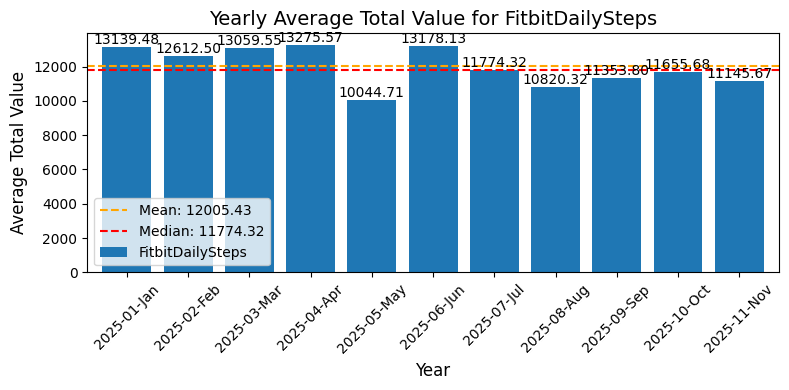

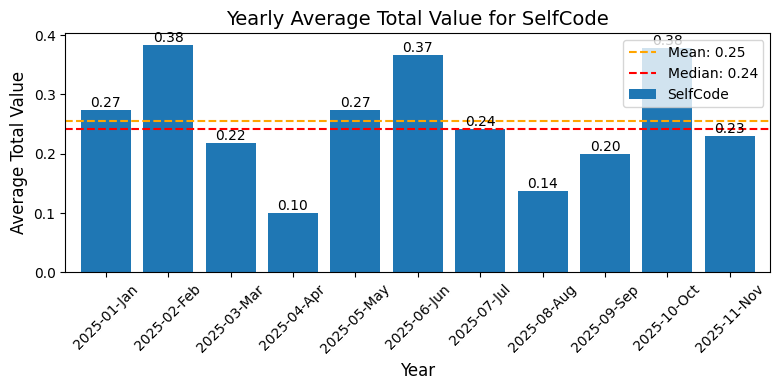

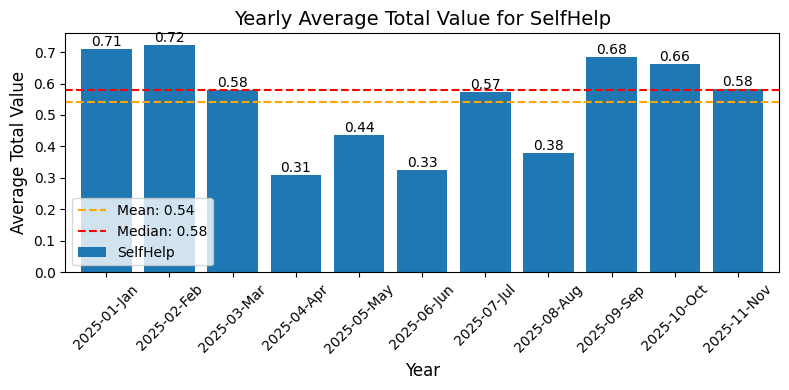

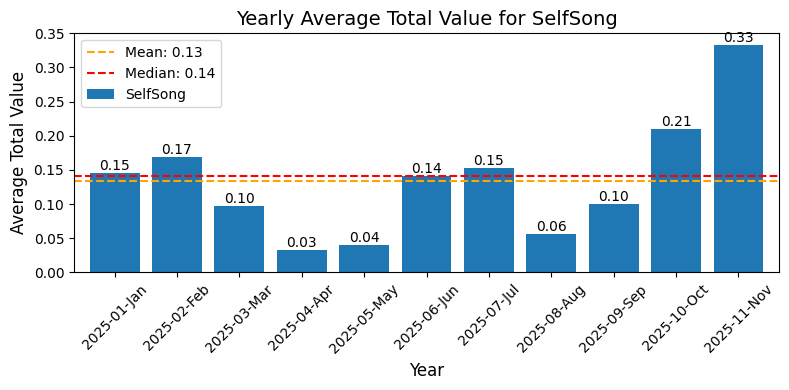

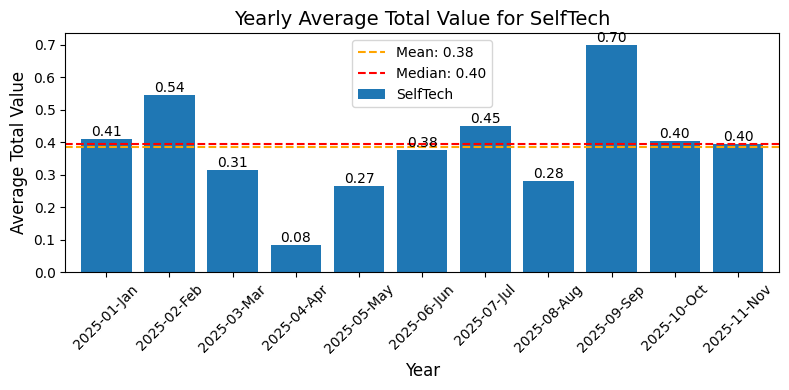

In [32]:
pivot_data = yearly_avg.pivot(index='Year', columns='Category', values='TotalValue')
# Filter monthly_avg for the current year
current_year = pd.Timestamp.now().year
monthly_avg_current_year = monthly_avg[monthly_avg['Month'].str.startswith(str(current_year))]

# Pivot the data for the current year
pivot_data = monthly_avg_current_year.pivot(index='Month', columns='Category', values='TotalValue')
# Iterate through each category and plot a separate graph
for category in pivot_data.columns:
    plt.figure(figsize=(8, 4))
    ax = pivot_data[category].dropna().plot(kind='bar', width=0.8)

    # Add labels and title
    plt.title(f'Yearly Average Total Value for {category}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Total Value', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()

    # Calculate mean and median for the category
    mean_value = pivot_data[category].mean()
    median_value = pivot_data[category].median()

    # Plot mean as an orange dotted line
    plt.axhline(y=mean_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    # Plot median as a red dotted line
    plt.axhline(y=median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()


In [13]:
top_10_records = df.sort_values(by='ActivityDate', ascending=False).head(10)
top_10_records.sort_values(by=['ActivityDate','Category'], ascending=[False, True])

,Category,ActivityDate,TotalValue,Year,Quarter,Month,Week
11199,FitbitDailySteps,2025-11-12,0.00,2025,2025Q4,2025-11-Nov,2025-Week45
11196,SelfCode,2025-11-12,0.50,2025,2025Q4,2025-11-Nov,2025-Week45
11195,SelfHelp,2025-11-12,1.00,2025,2025Q4,2025-11-Nov,2025-Week45
11198,SelfSong,2025-11-12,0.25,2025,2025Q4,2025-11-Nov,2025-Week45
11197,SelfTech,2025-11-12,0.50,2025,2025Q4,2025-11-Nov,2025-Week45
11194,FitbitDailySteps,2025-11-11,5870.00,2025,2025Q4,2025-11-Nov,2025-Week45
11191,SelfCode,2025-11-11,0.00,2025,2025Q4,2025-11-Nov,2025-Week45
11190,SelfHelp,2025-11-11,0.50,2025,2025Q4,2025-11-Nov,2025-Week45
11193,SelfSong,2025-11-11,0.25,2025,2025Q4,2025-11-Nov,2025-Week45
11192,SelfTech,2025-11-11,0.50,2025,2025Q4,2025-11-Nov,2025-Week45


/var/folders/59/35nd85z13ynb37313bsq35v00000gp/T/ipykernel_23439/3127839748.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_12_weeks = weekly_sum.groupby('Category').apply(lambda x: x.tail(12)).reset_index(drop=True)


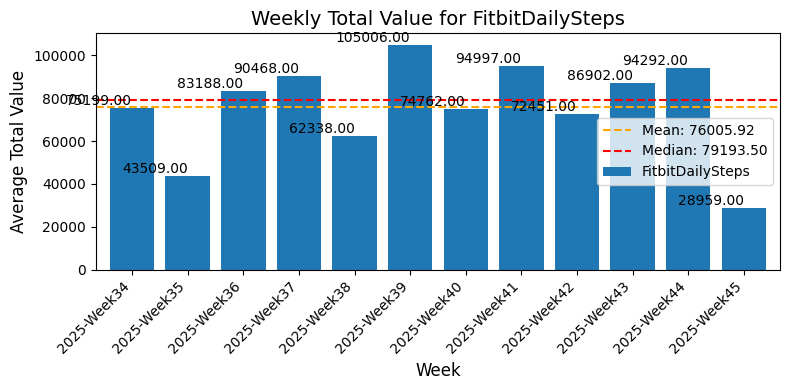

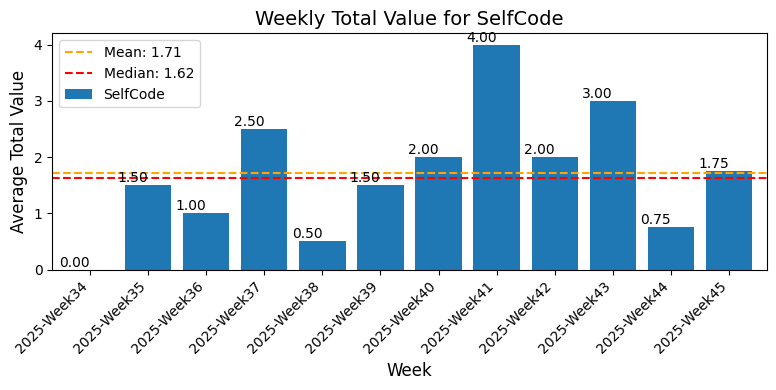

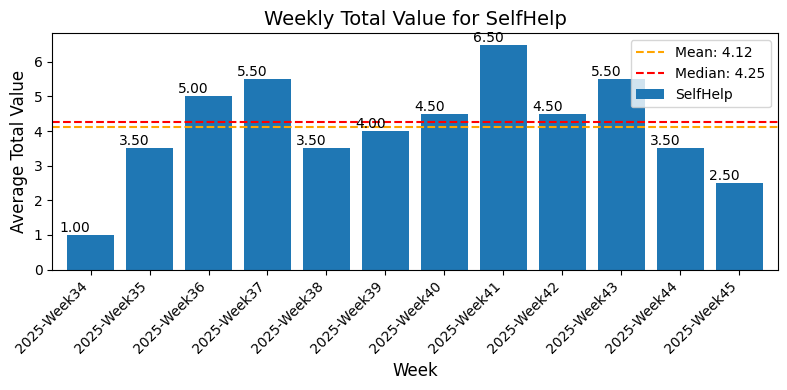

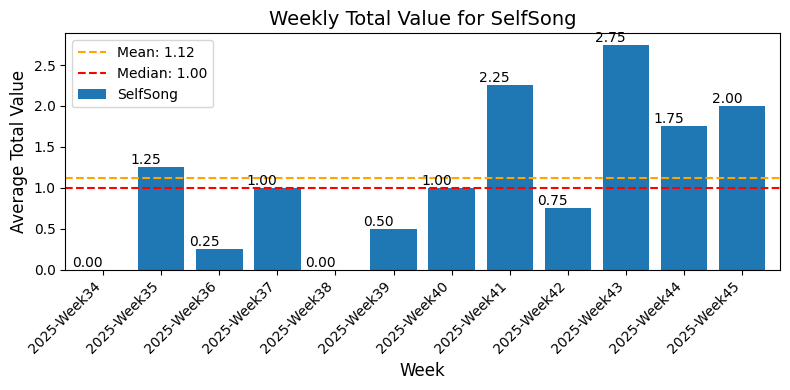

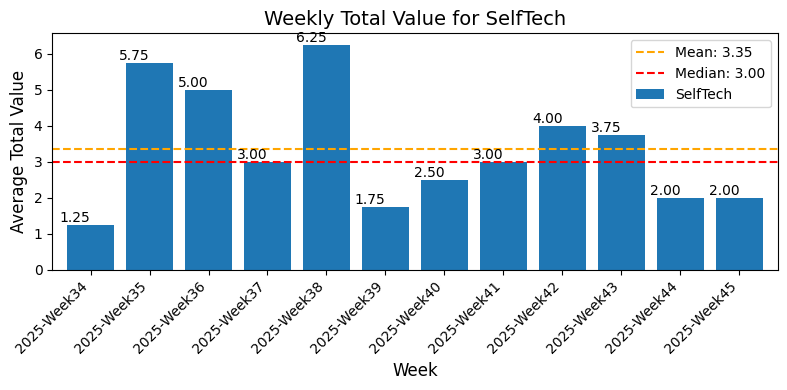

In [14]:
# Take the last 12 weeks data from weekly_avg
last_12_weeks = weekly_sum.groupby('Category').apply(lambda x: x.tail(12)).reset_index(drop=True)
last_12_weeks
# Pivot the data for the last 12 weeks
pivot_data = last_12_weeks.pivot(index='Week', columns='Category', values='TotalValue')


# Iterate through each category and plot a separate graph
for category in pivot_data.columns:
    plt.figure(figsize=(8, 4))
    ax = pivot_data[category].dropna().plot(kind='bar', width=0.8)

    # Add labels and title
    plt.title(f'Weekly Total Value for {category}', fontsize=14)
    plt.xlabel('Week', fontsize=12)
    plt.ylabel('Average Total Value', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()

    # Calculate mean and median for the category
    mean_value = pivot_data[category].mean()
    median_value = pivot_data[category].median()

    # Plot mean as an orange dotted line
    plt.axhline(y=mean_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    # Plot median as a red dotted line
    plt.axhline(y=median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='right', va='bottom', fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()

In [15]:
pivot_data

Category,FitbitDailySteps,SelfCode,SelfHelp,SelfSong,SelfTech
Week,,,,,
2025-Week34,75199.0,0.00,1.0,0.00,1.25
2025-Week35,43509.0,1.50,3.5,1.25,5.75
2025-Week36,83188.0,1.00,5.0,0.25,5.00
2025-Week37,90468.0,2.50,5.5,1.00,3.00
2025-Week38,62338.0,0.50,3.5,0.00,6.25
2025-Week39,105006.0,1.50,4.0,0.50,1.75
2025-Week40,74762.0,2.00,4.5,1.00,2.50
2025-Week41,94997.0,4.00,6.5,2.25,3.00
2025-Week42,72451.0,2.00,4.5,0.75,4.00


In [16]:


# Create a function to plot the graph for a specific category
def plot_graph(category):
    clear_output(wait=True)  # Clear the output area
    plt.figure(figsize=(8, 4))
    ax = pivot_data[category].dropna().plot(kind='bar', width=0.8)

    # Add labels and title
    plt.title(f'Weekly Total Value for {category}', fontsize=14)
    plt.xlabel('Week', fontsize=12)
    plt.ylabel('Average Total Value', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()

    # Calculate mean and median for the category
    mean_value = pivot_data[category].mean()
    median_value = pivot_data[category].median()

    # Plot mean as an orange dotted line
    plt.axhline(y=mean_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    # Plot median as a red dotted line
    plt.axhline(y=median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='right', va='bottom', fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()
    display(button_box)

# Create buttons for each category
buttons = []
for category in pivot_data.columns:
    button = widgets.Button(description=category)
    buttons.append(button)

    # Attach an event handler to the button
    button.on_click(lambda b, cat=category: plot_graph(cat))

# Display the buttons
button_box = widgets.HBox(buttons)
display(button_box)

In [17]:
# df.to_parquet('parquet')
# df.to_pickle('pickle')

<Axes: xlabel='Category'>

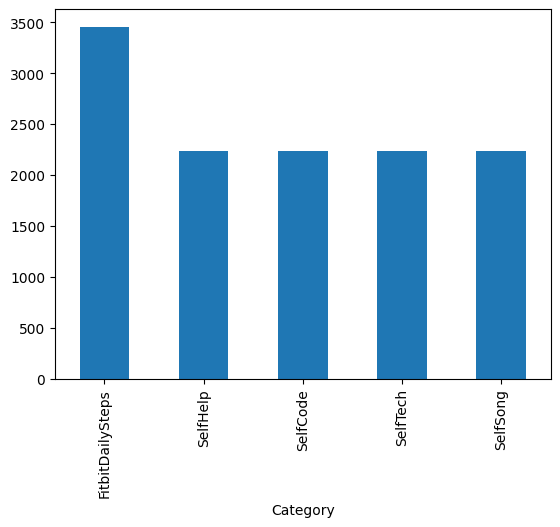

In [18]:
fig, ax = plt.subplots()
df['Category'].value_counts().plot(kind='bar')


### PIE Charts

In [19]:
df['NonZero'] = df['TotalValue'] != 0

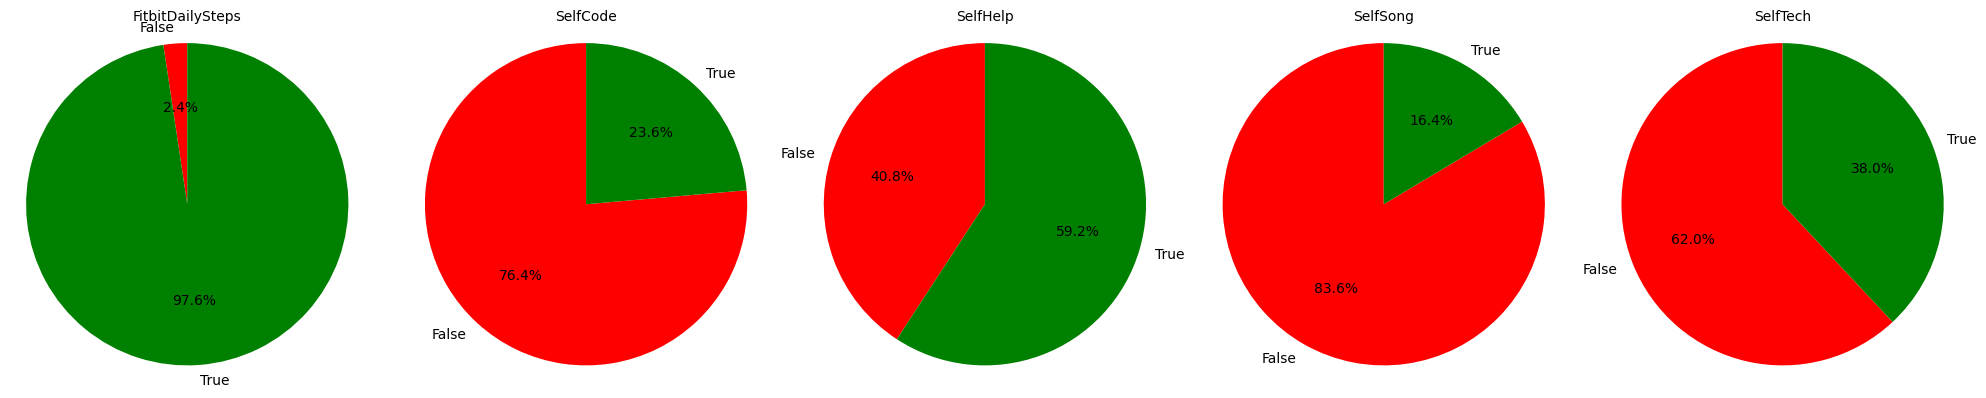

In [20]:
# pie chart examples good for boolean. https://www.youtube.com/watch?v=wUSDVGivd-8&t=30603s
# Group by Category and NonZero to calculate counts
nonzero_counts = df.groupby(['Category', 'NonZero']).size().unstack(fill_value=0)

# Set up the figure for compact pie charts
fig, axes = plt.subplots(1, len(nonzero_counts), figsize=(len(nonzero_counts) * 4, 4))

# Iterate through each category and plot a pie chart
for ax, category in zip(axes, nonzero_counts.index):
    values = nonzero_counts.loc[category]
    labels = ['False', 'True']
    colors = ['red', 'green']

    ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90) #autopct='%1.1f%%' shows percentage values on chart.
    ax.set_title(category, fontsize=10)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Adjust layout to ensure charts fit in a single row
plt.tight_layout()
plt.show()

### plot points
### Adjust Text


In [21]:
df

,Category,ActivityDate,TotalValue,Year,Quarter,Month,Week,NonZero
0,SelfHelp,2019-09-26,0.0,2019,2019Q3,2019-09-Sep,2019-Week38,False
1,SelfCode,2019-09-26,0.0,2019,2019Q3,2019-09-Sep,2019-Week38,False
2,SelfTech,2019-09-26,0.0,2019,2019Q3,2019-09-Sep,2019-Week38,False
3,SelfSong,2019-09-26,0.0,2019,2019Q3,2019-09-Sep,2019-Week38,False
4,FitbitDailySteps,2019-09-26,18788.0,2019,2019Q3,2019-09-Sep,2019-Week38,True
...,...,...,...,...,...,...,...,...
12411,FitbitDailySteps,2019-09-21,2951.0,2019,2019Q3,2019-09-Sep,2019-Week37,True
12412,FitbitDailySteps,2019-09-22,178.0,2019,2019Q3,2019-09-Sep,2019-Week38,True
12413,FitbitDailySteps,2019-09-23,9480.0,2019,2019Q3,2019-09-Sep,2019-Week38,True
12414,FitbitDailySteps,2019-09-24,17715.0,2019,2019Q3,2019-09-Sep,2019-Week38,True


### Histogram

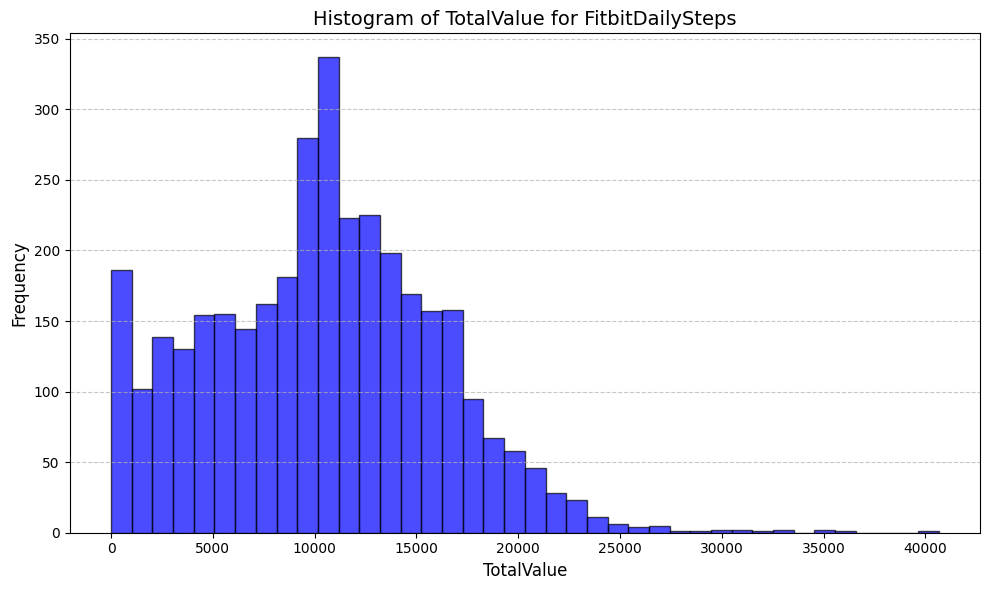

In [26]:
# Filter the dataframe for the 'FitbitDailySteps' category
fitbit_data = df[df['Category'] == 'FitbitDailySteps']
# fitbit_data = df[df['Category'] == 'SelfHelp']
# Plot the histogram for the 'TotalValue' column
plt.figure(figsize=(10, 6))
plt.hist(fitbit_data['TotalValue'], bins=40, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Histogram of TotalValue for FitbitDailySteps', fontsize=14)
plt.xlabel('TotalValue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Boxplot

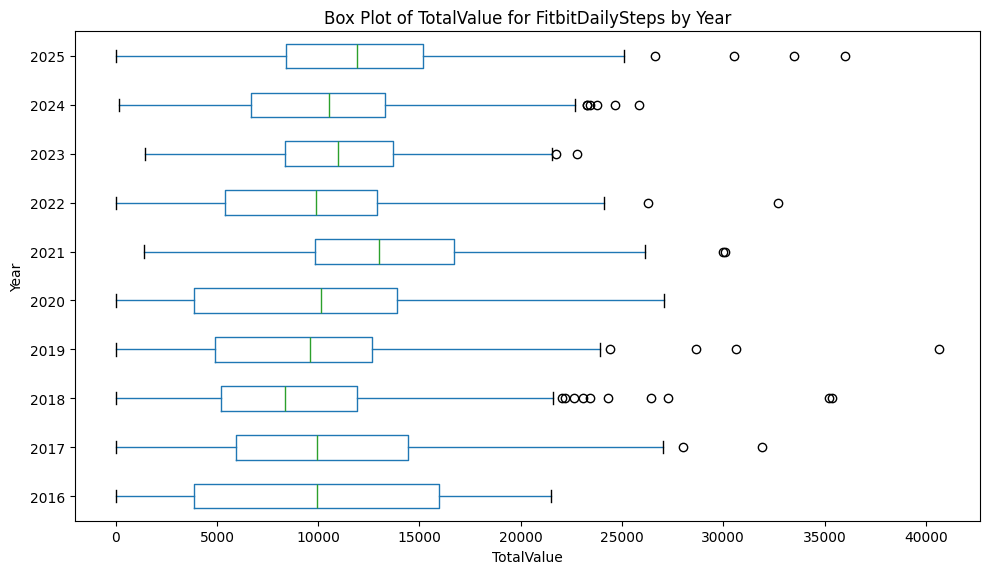

In [23]:
# Filter the dataframe for the 'FitbitDailySteps' category
fitbit_data = df[df['Category'] == 'FitbitDailySteps']
fitbit_data.head()
fitbit_data.boxplot(column='TotalValue', by='Year', figsize=(10, 6), vert=False, grid=False)
plt.title('Box Plot of TotalValue for FitbitDailySteps by Year')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.xlabel('TotalValue')
plt.ylabel('Year')
plt.tight_layout()
plt.show()